In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# 장치 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 하이퍼파라미터 설정
batch_size = 128
learning_rate = 0.0002
num_epochs = 25

# 데이터셋 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = dset.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)


100%|██████████| 26421880/26421880 [00:02<00:00, 9468073.63it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 150152.68it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 552350.95it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4346271.54it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
class VanillaGenerator(nn.Module):
    def __init__(self):
        super(VanillaGenerator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

class VanillaDiscriminator(nn.Module):
    def __init__(self):
        super(VanillaDiscriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.main(x.view(-1, 28*28))

In [ ]:
class DCGenerator(nn.Module):
    def __init__(self, n_features=128):
        super(DCGenerator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(n_features, 256, kernel_size=3, stride=1, bias=False),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, bias=False),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, bias=False),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2, padding=1, bias=False),
            nn.Tanh()
        )
    def forward(self, x):
        x = x.view(x.size(0), -1, 1, 1)
        return self.main(x)

class DCDiscriminator(nn.Module):
    def __init__(self):
        super(DCDiscriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.5),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.5),
            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.5),
            nn.Conv2d(256, 1, kernel_size=3, stride=2, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.main(x)
        return x.view(-1, 1)


In [ ]:
# 모델 초기화
vanilla_generator = VanillaGenerator().to(device)
vanilla_discriminator = VanillaDiscriminator().to(device)
dc_generator = DCGenerator().to(device)
dc_discriminator = DCDiscriminator().to(device)

# 손실 함수와 옵티마이저
criterion = nn.BCELoss()
vanilla_g_optimizer = optim.Adam(vanilla_generator.parameters(), lr=learning_rate)
vanilla_d_optimizer = optim.Adam(vanilla_discriminator.parameters(), lr=learning_rate)
dc_g_optimizer = optim.Adam(dc_generator.parameters(), lr=learning_rate)
dc_d_optimizer = optim.Adam(dc_discriminator.parameters(), lr=learning_rate)

# 손실 값을 저장할 리스트 초기화
vanilla_g_epoch_losses = []
vanilla_d_epoch_losses = []
dc_g_epoch_losses = []
dc_d_epoch_losses = []

# 생성된 이미지를 저장할 리스트 초기화
vanilla_images = []
dcgan_images = []


Epoch [1/25], G Loss: 1.8578, D Loss: 0.7967
Epoch [2/25], G Loss: 1.8709, D Loss: 0.7967
Epoch [3/25], G Loss: 1.8914, D Loss: 0.8265
Epoch [4/25], G Loss: 1.8455, D Loss: 0.8405
Epoch [5/25], G Loss: 1.9721, D Loss: 0.7742


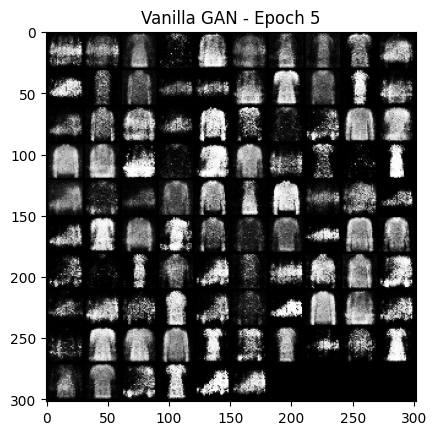

Epoch [6/25], G Loss: 1.8264, D Loss: 0.8140
Epoch [7/25], G Loss: 1.7406, D Loss: 0.8560
Epoch [8/25], G Loss: 1.7210, D Loss: 0.8373
Epoch [9/25], G Loss: 1.6432, D Loss: 0.9066
Epoch [10/25], G Loss: 1.6408, D Loss: 0.8888


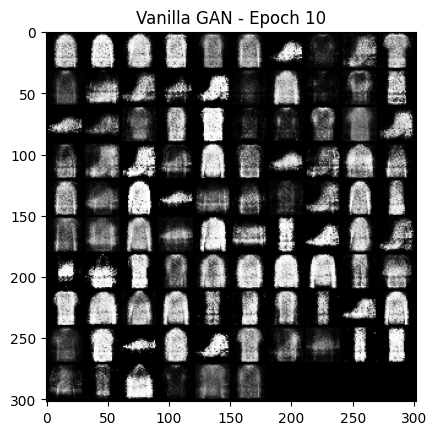

Epoch [11/25], G Loss: 1.6665, D Loss: 0.8767
Epoch [12/25], G Loss: 1.5905, D Loss: 0.8943
Epoch [13/25], G Loss: 1.6210, D Loss: 0.8908
Epoch [14/25], G Loss: 1.5438, D Loss: 0.9210
Epoch [15/25], G Loss: 1.5570, D Loss: 0.9119


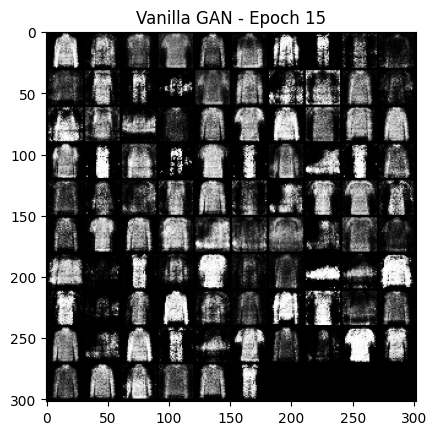

Epoch [16/25], G Loss: 1.5122, D Loss: 0.9444
Epoch [17/25], G Loss: 1.5045, D Loss: 0.9533
Epoch [18/25], G Loss: 1.5852, D Loss: 0.9093
Epoch [19/25], G Loss: 1.5667, D Loss: 0.8958
Epoch [20/25], G Loss: 1.4659, D Loss: 0.9536


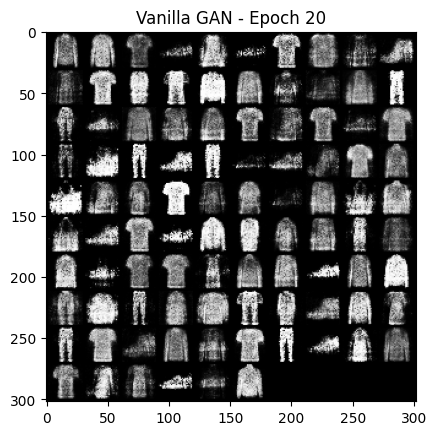

Epoch [21/25], G Loss: 1.4760, D Loss: 0.9447
Epoch [22/25], G Loss: 1.4268, D Loss: 0.9751
Epoch [23/25], G Loss: 1.3982, D Loss: 0.9848
Epoch [24/25], G Loss: 1.4427, D Loss: 0.9681
Epoch [25/25], G Loss: 1.3877, D Loss: 0.9889


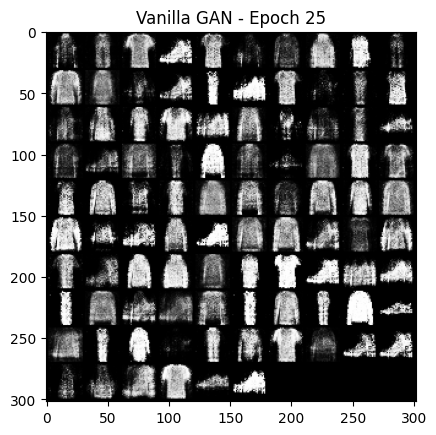

In [ ]:
# Vanilla GAN 훈련 루프
for epoch in range(num_epochs):
    vanilla_g_loss_epoch = 0.0
    vanilla_d_loss_epoch = 0.0
    for i, (images, _) in enumerate(trainloader):
        images = images.to(device)
        batch_size = images.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # 판별기 훈련
        outputs = vanilla_discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 128).to(device)
        fake_images = vanilla_generator(z)
        outputs = vanilla_discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        vanilla_d_optimizer.zero_grad()
        d_loss.backward()
        vanilla_d_optimizer.step()

        # 생성기 훈련
        z = torch.randn(batch_size, 128).to(device)
        fake_images = vanilla_generator(z)
        outputs = vanilla_discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        vanilla_g_optimizer.zero_grad()
        g_loss.backward()
        vanilla_g_optimizer.step()

        vanilla_d_loss_epoch += d_loss.item()
        vanilla_g_loss_epoch += g_loss.item()

    vanilla_g_epoch_losses.append(vanilla_g_loss_epoch / len(trainloader))
    vanilla_d_epoch_losses.append(vanilla_d_loss_epoch / len(trainloader))

     # 에포크 손실 출력
    print(f'Epoch [{epoch+1}/{num_epochs}], G Loss: {vanilla_g_loss_epoch / len(trainloader):.4f}, D Loss: {vanilla_d_loss_epoch / len(trainloader):.4f}')

    if (epoch+1) % 5 == 0:
        fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
        fake_images = fake_images.data.cpu()
        vanilla_images.append(fake_images)
        grid = make_grid(fake_images, nrow=10, normalize=True)
        plt.imshow(grid.permute(1, 2, 0))
        plt.title(f'Vanilla GAN - Epoch {epoch+1}')
        plt.show()


Epoch [1/25], G Loss: 0.8412, D Loss: 0.7448
Epoch [2/25], G Loss: 0.7964, D Loss: 0.8570
Epoch [3/25], G Loss: 1.0152, D Loss: 0.7843
Epoch [4/25], G Loss: 0.7700, D Loss: 0.7783
Epoch [5/25], G Loss: 0.7552, D Loss: 0.7780


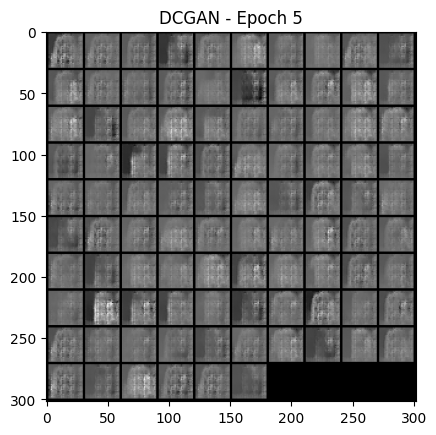

Epoch [6/25], G Loss: 0.7681, D Loss: 0.7621
Epoch [7/25], G Loss: 0.7712, D Loss: 0.7514
Epoch [8/25], G Loss: 0.7226, D Loss: 0.7694
Epoch [9/25], G Loss: 0.7594, D Loss: 0.7570
Epoch [10/25], G Loss: 0.7500, D Loss: 0.7646


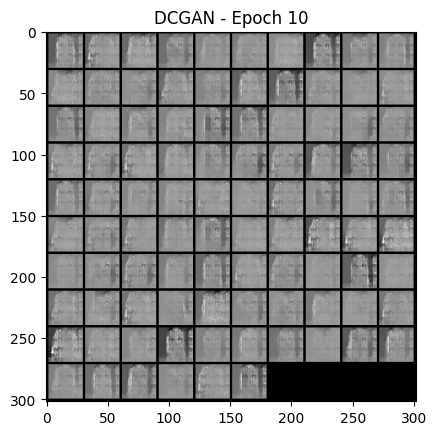

Epoch [11/25], G Loss: 0.7642, D Loss: 0.7489
Epoch [12/25], G Loss: 0.7202, D Loss: 0.7707
Epoch [13/25], G Loss: 0.7373, D Loss: 0.7628
Epoch [14/25], G Loss: 0.7208, D Loss: 0.7704
Epoch [15/25], G Loss: 0.7278, D Loss: 0.7586


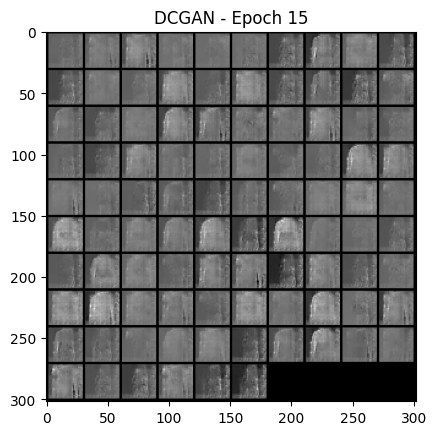

Epoch [16/25], G Loss: 0.7650, D Loss: 0.7523
Epoch [17/25], G Loss: 0.7240, D Loss: 0.7632
Epoch [18/25], G Loss: 0.7150, D Loss: 0.7709
Epoch [19/25], G Loss: 0.7407, D Loss: 0.7580
Epoch [20/25], G Loss: 0.7090, D Loss: 0.7634


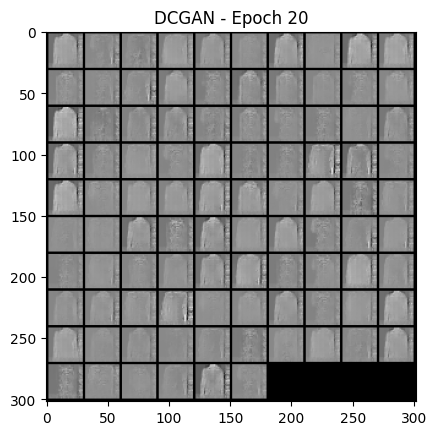

Epoch [21/25], G Loss: 0.7268, D Loss: 0.7632
Epoch [22/25], G Loss: 0.7475, D Loss: 0.7590
Epoch [23/25], G Loss: 0.7087, D Loss: 0.7742
Epoch [24/25], G Loss: 0.7196, D Loss: 0.7604
Epoch [25/25], G Loss: 0.7242, D Loss: 0.7691


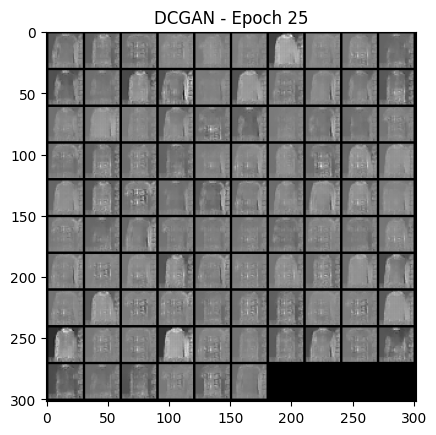

In [ ]:
# DCGAN 훈련 루프
for epoch in range(num_epochs):
    dc_g_loss_epoch = 0.0
    dc_d_loss_epoch = 0.0
    for i, (images, _) in enumerate(trainloader):
        images = images.to(device)
        batch_size = images.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # 판별기 훈련
        outputs = dc_discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 128).to(device)
        fake_images = dc_generator(z)
        outputs = dc_discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        dc_d_optimizer.zero_grad()
        d_loss.backward()
        dc_d_optimizer.step()

        # 생성기 훈련
        z = torch.randn(batch_size, 128).to(device)
        fake_images = dc_generator(z)
        outputs = dc_discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        dc_g_optimizer.zero_grad()
        g_loss.backward()
        dc_g_optimizer.step()

        dc_d_loss_epoch += d_loss.item()
        dc_g_loss_epoch += g_loss.item()

    dc_g_epoch_losses.append(dc_g_loss_epoch / len(trainloader))
    dc_d_epoch_losses.append(dc_d_loss_epoch / len(trainloader))

     # 에포크 손실 출력
    print(f'Epoch [{epoch+1}/{num_epochs}], G Loss: {dc_g_loss_epoch / len(trainloader):.4f}, D Loss: {dc_d_loss_epoch / len(trainloader):.4f}')

    if (epoch+1) % 5 == 0:
        fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
        fake_images = fake_images.data.cpu()
        dcgan_images.append(fake_images)
        grid = make_grid(fake_images, nrow=10, normalize=True)
        plt.imshow(grid.permute(1, 2, 0))
        plt.title(f'DCGAN - Epoch {epoch+1}')
        plt.show()


 (2) Compare the losses of the generators and the discriminator from Vanilla GAN and DCGAN.

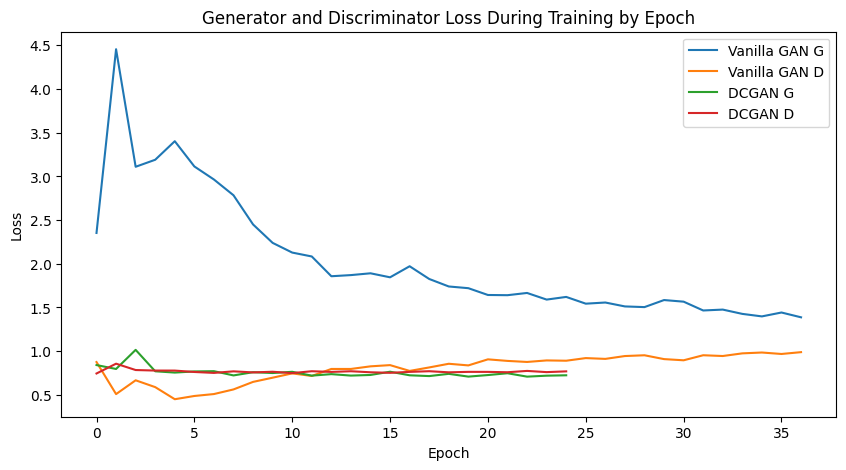

In [ ]:
# 에포크 수에 따른 손실 플롯
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training by Epoch")
plt.plot(vanilla_g_epoch_losses, label="Vanilla GAN G")
plt.plot(vanilla_d_epoch_losses, label="Vanilla GAN D")
plt.plot(dc_g_epoch_losses, label="DCGAN G")
plt.plot(dc_d_epoch_losses, label="DCGAN D")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


- 정리
= DCGAN은 Vanilla GAN에 비해 생성기(Generator)와 판별기(Discriminator)의 손실이 더 안정적이고 낮습니다. 이는 DCGAN이 더 나은 균형을 이루고 있음을 나타냅니다.

 (3) Compare the image quality of DCGAN with Vanilla GAN.

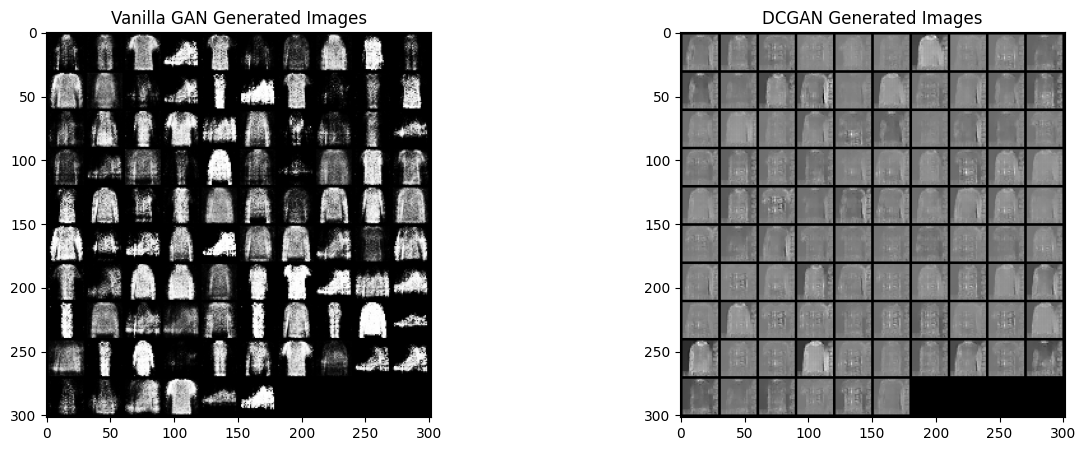

In [ ]:
# 마지막 에포크의 생성된 이미지 비교
plt.figure(figsize=(15, 5))

# Vanilla GAN 이미지
plt.subplot(1, 2, 1)
grid = make_grid(vanilla_images[-1], nrow=10, normalize=True)
plt.imshow(grid.permute(1, 2, 0))
plt.title('Vanilla GAN Generated Images')

# DCGAN 이미지
plt.subplot(1, 2, 2)
grid = make_grid(dcgan_images[-1], nrow=10, normalize=True)
plt.imshow(grid.permute(1, 2, 0))
plt.title('DCGAN Generated Images')

plt.show()

- 정리
= DCGAN은 Vanilla GAN보다 훨씬 더 높은 품질의 이미지를 생성합니다. 구조가 명확하고 노이즈가 적어, DCGAN이 더 효과적으로 학습하고 현실적인 이미지를 생성할 수 있음을 보여줍니다.